# Cleaning and prepping dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_theme()

In [4]:
df = pd.read_csv('datasets/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Check null values

In [5]:
df.isna().sum().count

<bound method Series.count of id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64>

No null values to clean.

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Check age

<AxesSubplot:xlabel='age', ylabel='Count'>

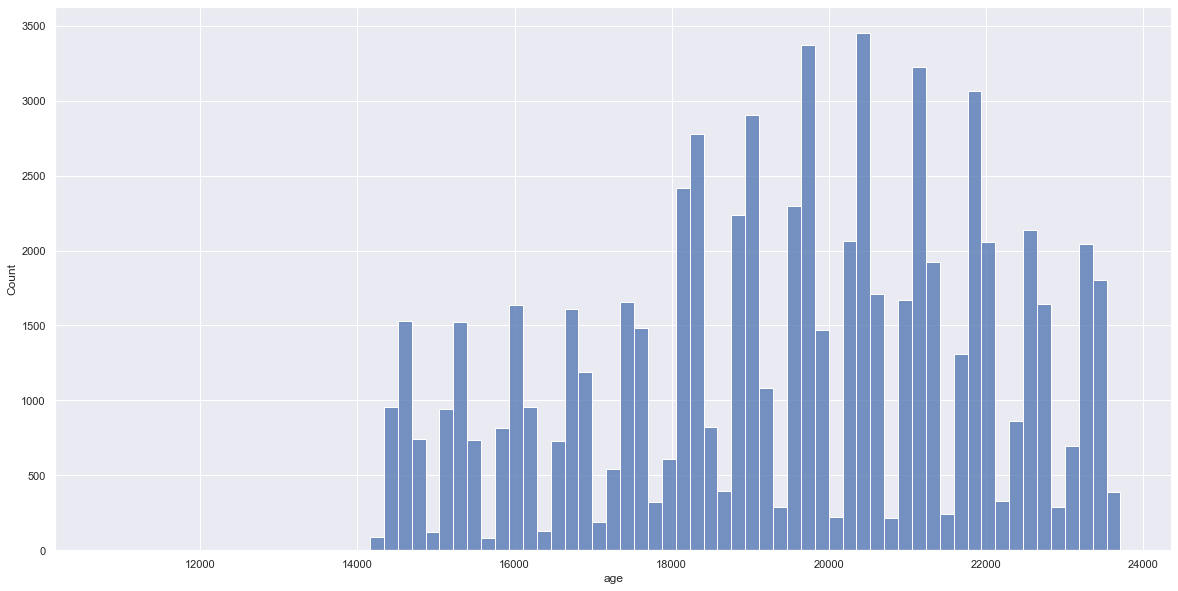

In [7]:
fig,ax = plt.subplots(figsize=(20,10))
sb.histplot(df['age'])

In [8]:
#new column that represents age in terms of years for easier interpretation
df['age(year)'] = df['age']/365
df['age(int_year)'] = df['age(year)'].astype(int).copy()

In [9]:
df['age(int_year)'].describe()

count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age(int_year), dtype: float64

<AxesSubplot:xlabel='age(int_year)', ylabel='Count'>

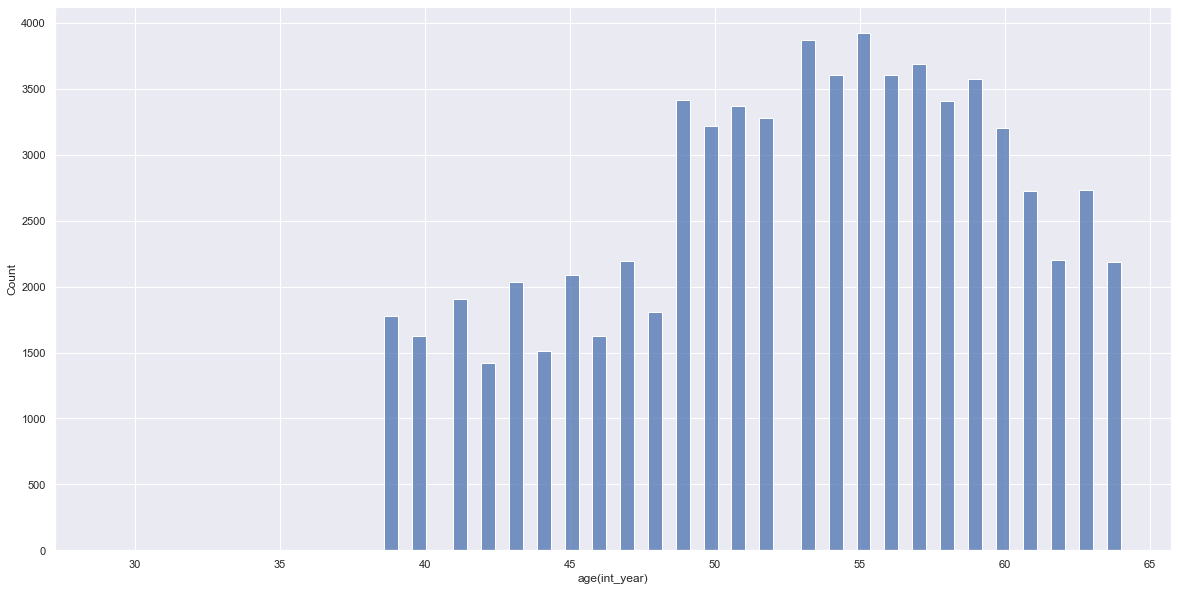

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
sb.histplot(df['age(int_year)'])

## Check gender

In [11]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [12]:
df['gender'].replace(1,'female',inplace=True)
df['gender'].replace(2,'male',inplace=True)

No values other than 1 or 2.

In [13]:
df['gender'].value_counts()

female    45530
male      24470
Name: gender, dtype: int64

In [14]:
#One-hot encoding for gender feature
g = pd.get_dummies(df['gender'])
df['female'] = g['female']
df['male'] = g['male']

In [15]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age(year),age(int_year),female,male
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,50.391781,50,0,1
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,55.419178,55,1,0
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,51.663014,51,1,0
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1,48.282192,48,0,1
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0,47.873973,47,1,0


Check height

In [16]:
df['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

<AxesSubplot:xlabel='height', ylabel='Count'>

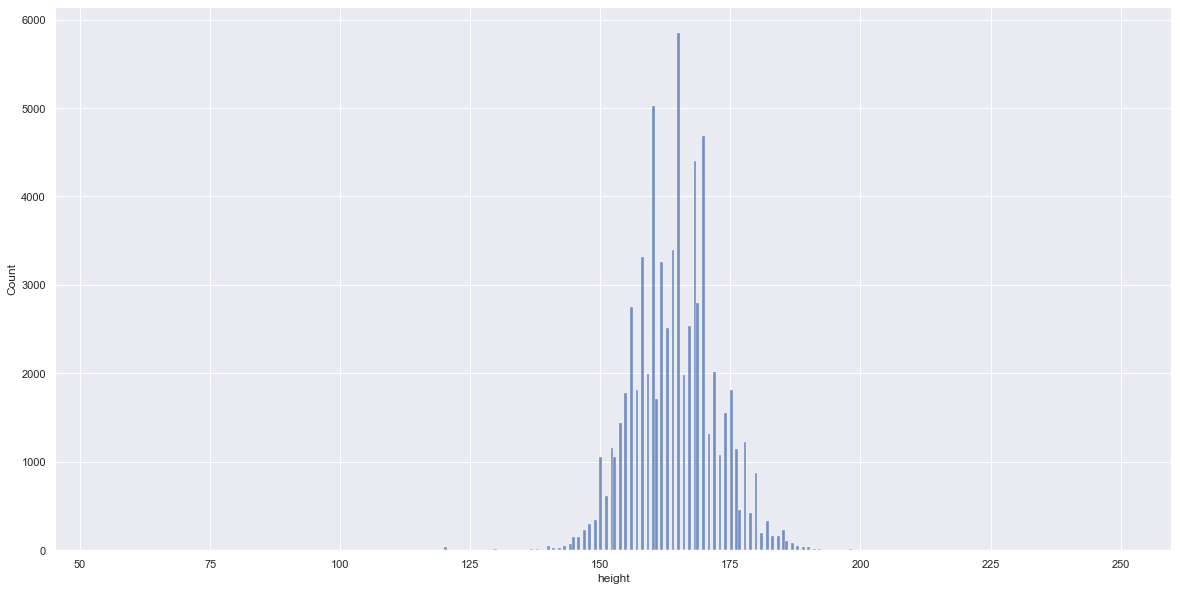

In [17]:
fig,ax = plt.subplots(figsize=(20,10))
sb.histplot(df['height'])

## Check weight

In [18]:
df['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

<AxesSubplot:xlabel='weight', ylabel='Count'>

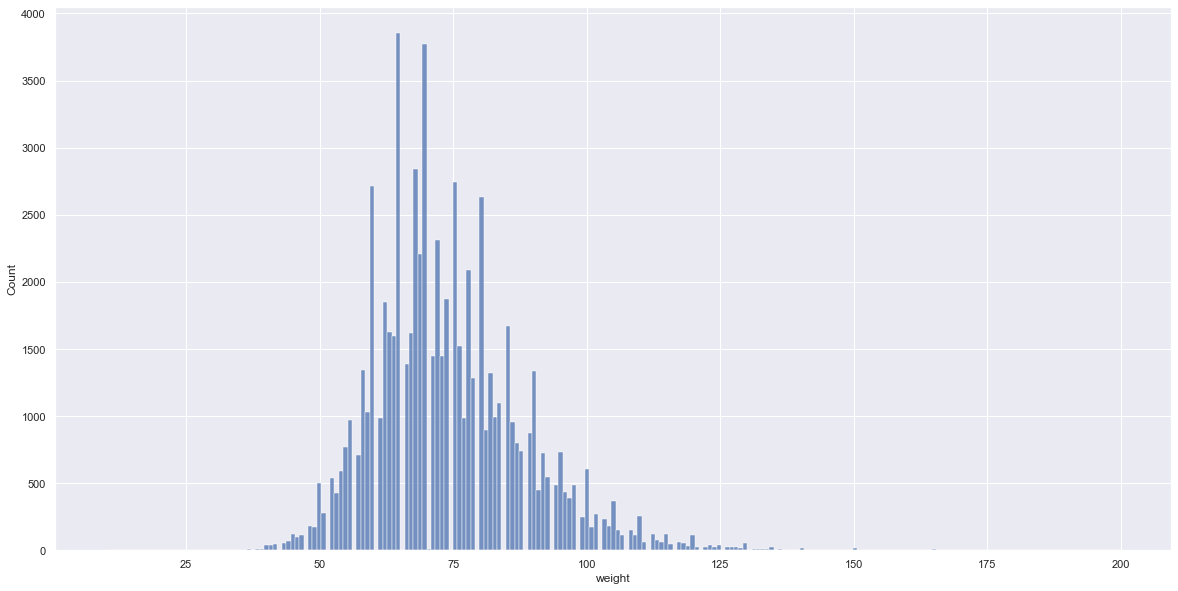

In [19]:
fig,ax = plt.subplots(figsize=(20,10))
sb.histplot(df['weight'])

## Check systolic and diastolic blood pressure

In [20]:
df[['ap_hi','ap_lo']].describe()

,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


In [21]:
#remove impossible negative values
df = df[df['ap_hi']>0]
df = df[df['ap_lo']>0]

In [22]:
#remove data points where systolic bp is lower than diastolic bp as that is impossible
df = df[df['ap_hi']>=df['ap_lo']]

<AxesSubplot:xlabel='ap_lo', ylabel='Count'>

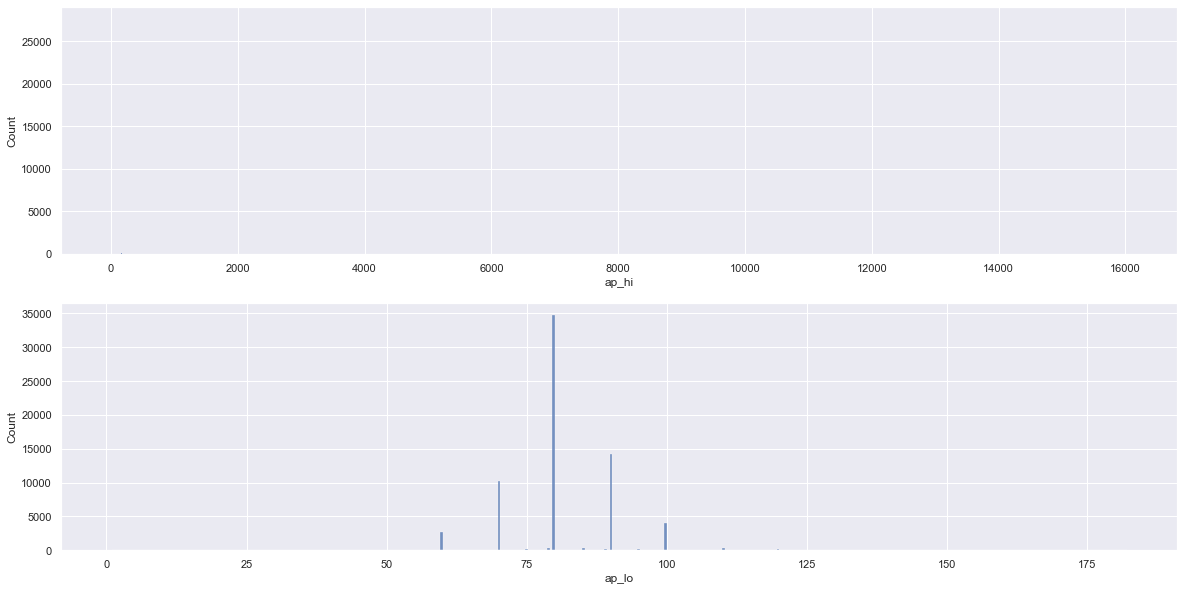

In [23]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
sb.histplot(df['ap_hi'],ax=ax[0])
sb.histplot(df['ap_lo'],ax=ax[1])

Still some systolic bp that are extremely high

In [24]:
#Remove data with systolic bp 370 or higher as highest recorded bp is around 370. (https://doi.org/10.1016/s0003-9993(95)80578-8)
df = df[df['ap_hi']<370]

<AxesSubplot:xlabel='ap_lo', ylabel='Count'>

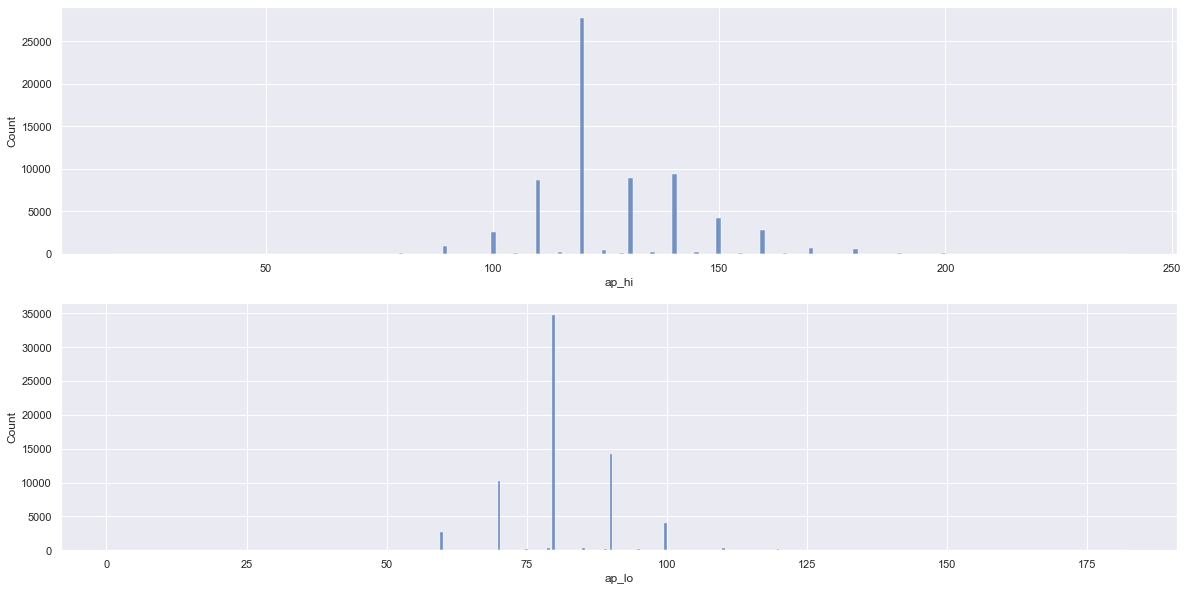

In [25]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
sb.histplot(df['ap_hi'],ax=ax[0])
sb.histplot(df['ap_lo'],ax=ax[1])

## Check cholesterol

In [26]:
df['cholesterol'].value_counts()

1    51531
2     9305
3     7875
Name: cholesterol, dtype: int64

Only values are 1,2 and 3

## Check glucose

In [27]:
df['gluc'].value_counts()

1    58425
3     5217
2     5069
Name: gluc, dtype: int64

Only values are 1,2 and 3

## Check smoke

In [28]:
df['smoke'].value_counts()

0    62670
1     6041
Name: smoke, dtype: int64

## Check alcohol

In [29]:
df['alco'].value_counts()

0    65046
1     3665
Name: alco, dtype: int64

## Check physical activity

In [30]:
df['active'].value_counts()

1    55201
0    13510
Name: active, dtype: int64

## Check BMI

In [31]:
df['BMI'] = df['weight']/((0.01*df['height'])**2)

In [32]:
df['BMI'].describe()

count    68711.000000
mean        27.523149
std          6.068888
min          3.471784
25%         23.875115
50%         26.346494
75%         30.119376
max        298.666667
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI'>

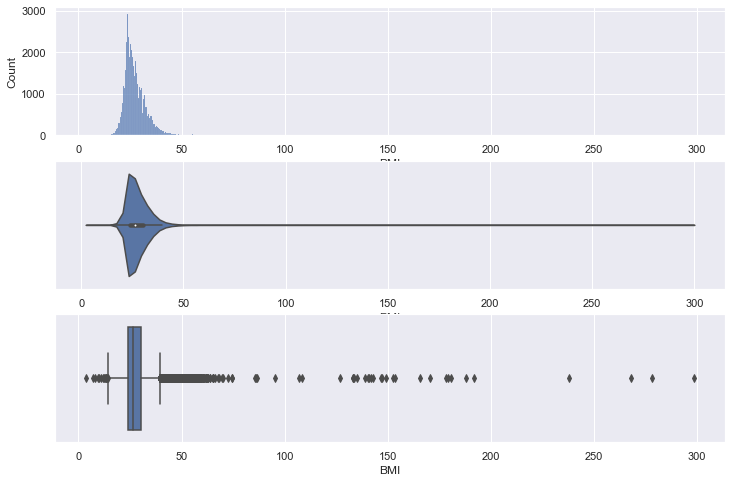

In [33]:
fig,ax = plt.subplots(3,1,figsize=(12,8))
sb.histplot(x='BMI', data=df, ax=ax[0])
sb.violinplot(x='BMI', data=df, ax=ax[1])
sb.boxplot(x='BMI', data=df, ax=ax[2])

Some data points have BMI values that are too high or too low to be physically possible.

In [34]:
#Remove datapoints with impossible BMI values based on lowest and highest BMI ever recorded (Lowest: 7.5, Highest: 251)
df = df[df['BMI']>=7.5]
df = df[df['BMI']<=251]

## Check target variable, cardiovascular disease

In [35]:
df['cardio'].value_counts()

0    34718
1    33988
Name: cardio, dtype: int64

In [36]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age(year),age(int_year),female,male,BMI
count,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000,68706.000000
mean,49974.249673,19464.232629,164.363403,74.116620,126.669199,81.272771,1.364641,1.225613,0.087896,0.053329,0.803365,0.494688,53.326665,52.827817,0.651399,0.348601,27.512707
std,28845.015703,2468.132495,8.167075,14.320416,16.708814,9.572855,0.678891,0.571447,0.283146,0.224690,0.397457,0.499975,6.762007,6.769107,0.476531,0.476531,5.830542
min,0.000000,10798.000000,57.000000,21.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562,29.000000,0.000000,0.000000,8.001829
25%,25002.250000,17657.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.375342,48.000000,0.000000,0.000000,23.875115
50%,50014.500000,19701.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.975342,53.000000,1.000000,0.000000,26.346494
75%,74867.750000,21324.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.421918,58.000000,1.000000,1.000000,30.119376
max,99999.000000,23713.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123,64.000000,1.000000,1.000000,237.768633


In [37]:
for col in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female', 'male']:
    df[col] = df[col].astype('category')

## Export prepped data

In [43]:
df.to_csv('datasets/prepped_dataset.csv',index=False)